# 第7课：线性模型

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## 1.Statistical models and patsy formula

In [2]:
np.random.seed(123456789)

In [3]:
y = np.array([1, 2, 3, 4, 5])

In [4]:
x1 = np.array([6, 7, 8, 9, 10])

In [5]:
x2 = np.array([11, 12, 13, 14, 15])

In [6]:
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

In [7]:
X

array([[   1.,    6.,   11.,   66.],
       [   1.,    7.,   12.,   84.],
       [   1.,    8.,   13.,  104.],
       [   1.,    9.,   14.,  126.],
       [   1.,   10.,   15.,  150.]])

In [8]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

In [9]:
model = sm.OLS(y, X)
result = model.fit()

In [10]:
result.params

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -1.11022302e-15])

In [11]:
data = {"y": y, "x1": x1, "x2": x2}
df_data = pd.DataFrame(data)

In [12]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)

In [13]:
result = model.fit()

In [14]:
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.110223e-15
dtype: float64

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.401e+26
Date:                Sun, 14 Aug 2016   Prob (F-statistic):           1.35e-27
Time:                        22:30:14   Log-Likelihood:                 145.84
No. Observations:                   5   AIC:                            -285.7
Df Residuals:                       2   BIC:                            -286.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5556   1.87e-13  -2.96e+12      0.0

/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [16]:
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

In [17]:
from collections import defaultdict

In [18]:
data = defaultdict(lambda: np.array([1,2,3]))

In [19]:
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [20]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [21]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [22]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [23]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [24]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [25]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [26]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [27]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [28]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [29]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [30]:
z = lambda x1, x2: x1+x2

In [31]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Categorical variables

In [32]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [33]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [35]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [36]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [37]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [38]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-4.433780e-17,-0.816497
2,1.0,7.071068e-01,0.408248


## 2. Linear regression

In [39]:
np.random.seed(123456789)

In [40]:
N = 100

In [41]:
x1 = np.random.randn(N)

In [42]:
x2 = np.random.randn(N)

In [43]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [44]:
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [45]:
data["y_true"] = y_true(x1, x2)

In [46]:
e = np.random.randn(N)

In [47]:
data["y"] = data["y_true"] + e

In [48]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


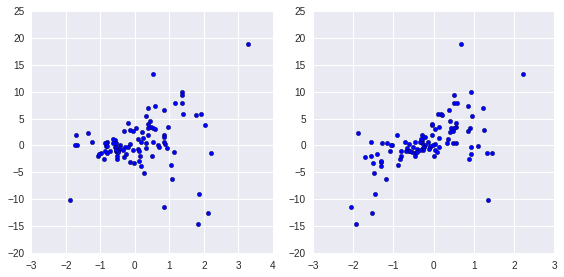

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [50]:
data.shape

(100, 4)

In [51]:
model = smf.ols("y ~ x1 + x2", data)

In [52]:
result = model.fit()

In [53]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Sun, 14 Aug 2016   Prob (F-statistic):           8.36e-11
Time:                        22:33:02   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.0

In [54]:
result.rsquared

0.38025383255132539

In [55]:
result.resid.head()

0    -3.370455
1   -11.153477
2   -11.721319
3    -0.948410
4     0.306215
dtype: float64

In [56]:
z, p = stats.normaltest(result.resid.values)

In [57]:
p

4.6524990253009038e-05

In [58]:
result.params

Intercept    0.986826
x1           1.081044
x2           3.079284
dtype: float64

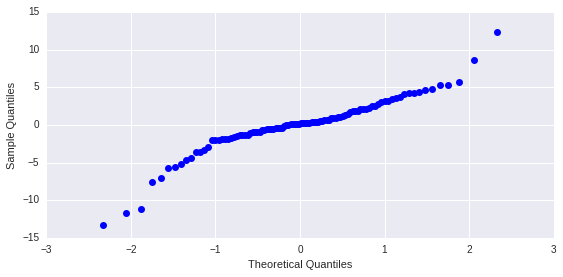

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()

In [60]:
model = smf.ols("y ~ x1 + x2 + x1:x2", data)

In [61]:
result = model.fit()

In [62]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Sun, 14 Aug 2016   Prob (F-statistic):           1.21e-64
Time:                        22:33:16   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [63]:
result.params

Intercept    0.870620
x1           1.969345
x2           2.967004
x1:x2        3.943993
dtype: float64

In [64]:
result.rsquared

0.95533937458843676

In [65]:
z, p = stats.normaltest(result.resid.values)

In [66]:
p

0.22874710482505148

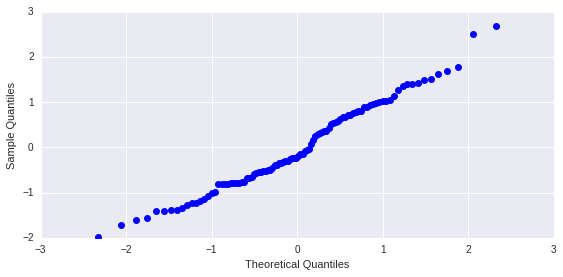

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()

In [68]:
x = np.linspace(-1, 1, 50)

In [69]:
X1, X2 = np.meshgrid(x, x)

In [70]:
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [71]:
y_pred = result.predict(new_data)

In [72]:
y_pred.shape

(2500,)

In [73]:
y_pred = y_pred.reshape(50, 50)

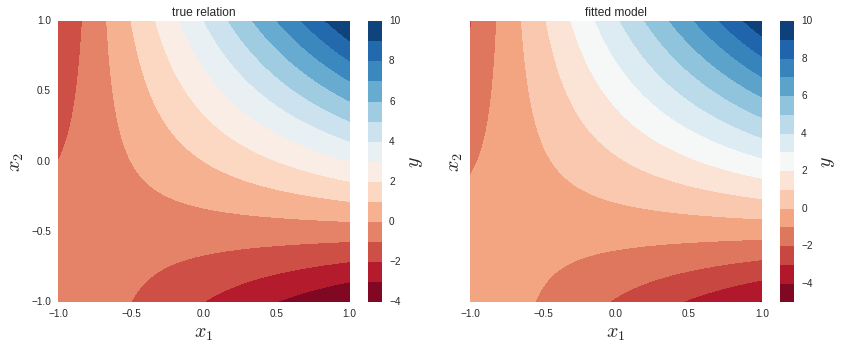

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()


### Datasets from R

In [3]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [76]:
dataset.title

'Ice Cream Consumption'

In [77]:
print(dataset.__doc__)

+------------+-------------------+
| Icecream   | R Documentation   |
+------------+-------------------+

Ice Cream Consumption
---------------------

Description
~~~~~~~~~~~

four–weekly observations from 1951–03–18 to 1953–07–11

*number of observations* : 30

*observation* : country

*country* : United States

Usage
~~~~~

::

    data(Icecream)

Format
~~~~~~

A time serie containing :

cons
    consumption of ice cream per head (in pints);

income
    average family income per week (in US Dollars);

price
    price of ice cream (per pint);

temp
    average temperature (in Fahrenheit);

Source
~~~~~~

Hildreth, C. and J. Lu (1960) *Demand relations with autocorrelated
disturbances*, Technical Bulletin No 2765, Michigan State University.

References
~~~~~~~~~~

Verbeek, Marno (2004) *A guide to modern econometrics*, John Wiley and
Sons,
`http://www.econ.kuleuven.ac.be/GME <http://www.econ.kuleuven.ac.be/GME>`__,
chapter 4.

See Also
~~~~~~~~

``Index.Source``, ``Index.Economics``, 

In [78]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


In [79]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)

In [80]:
result = model.fit()

In [81]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1001.
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           9.03e-27
Time:                        10:27:20   Log-Likelihood:                 51.903
No. Observations:                  30   AIC:                            -99.81
Df Residuals:                      28   BIC:                            -97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.0

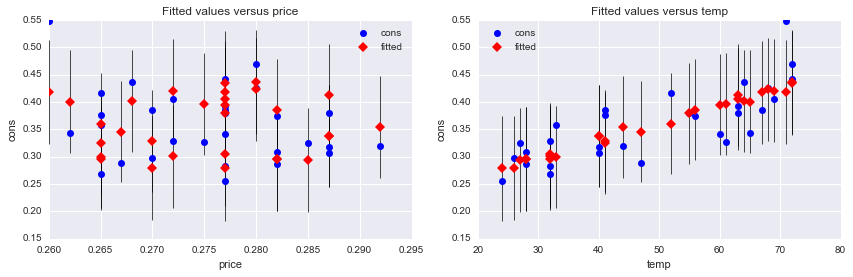

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()

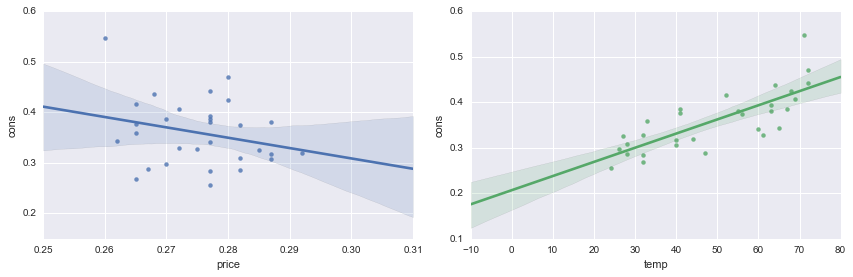

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot("price", "cons", dataset.data, ax=ax1);
sns.regplot("temp", "cons", dataset.data, ax=ax2);

fig.tight_layout()

## 3. logistic regression

In [4]:
df = sm.datasets.get_rdataset("iris").data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [86]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [87]:
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica" )].copy()

In [88]:
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})

In [89]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)

In [90]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [91]:
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)

In [92]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [93]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Mar 2016   Pseudo R-squ.:                  0.9142
Time:                        10:28:12   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097        -7.748    93.024
Sepal_Length     2.4652      2.394      1.030      0.303        -2.228     7.158
Sepal_Width      6.6809      4.480      1.49

In [94]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245        -0.031     0.120
Sepal_Width      0.1207      0.064      1.891      0.059        -0.004     0.246
Petal_Length    -0.1703      0.057     -2.965      0.003        -0.283    -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003        -0.546    -0.114


**Note:** Sepal_Length and Sepal_Width do not seem to contribute much to predictiveness of the model. 

In [95]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [96]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [97]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Mar 2016   Pseudo R-squ.:                  0.8517
Time:                        10:28:19   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001        18.594    71.951
Petal_Length    -5.7545      2.306     -2.496      0.013       -10.274    -1.235
Petal_Width    -10.4467      3.756     -2.78

In [98]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001        -0.275    -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000        -0.449    -0.181


In [99]:
params = result.params
beta0 = -params['Intercept']/params['Petal_Width']
beta1 = -params['Petal_Length']/params['Petal_Width']

In [100]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})

In [101]:
df_new["P-Species"] = result.predict(df_new)

In [102]:
df_new["P-Species"].head(3)

0    0.995472
1    0.799899
2    0.000033
Name: P-Species, dtype: float64

In [103]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [104]:
df_new.head()

,Petal_Length,Petal_Width,P-Species,Species
0,4.717684,1.218695,0.995472,1
1,5.280952,1.292013,0.799899,1
2,5.610778,2.230056,0.000033,0
3,4.458715,1.907844,0.421614,0
4,4.822227,1.938929,0.061070,0


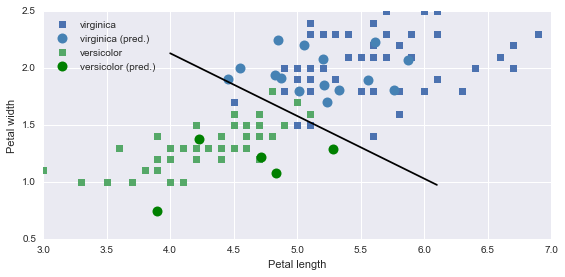

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()

## 4. Time series

In [2]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

In [3]:
df_march = df[df.index.month == 3]

In [4]:
df_april = df[df.index.month == 4]

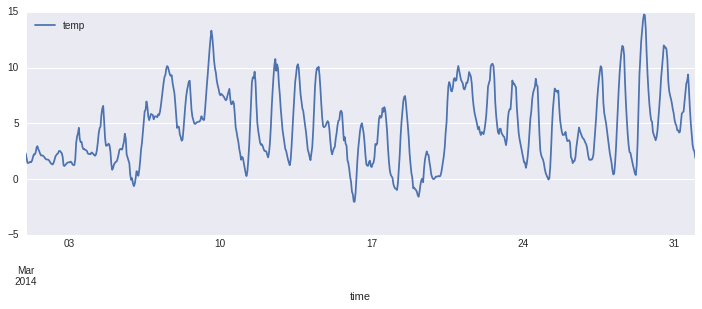

In [5]:
df_march.plot(figsize=(12, 4));

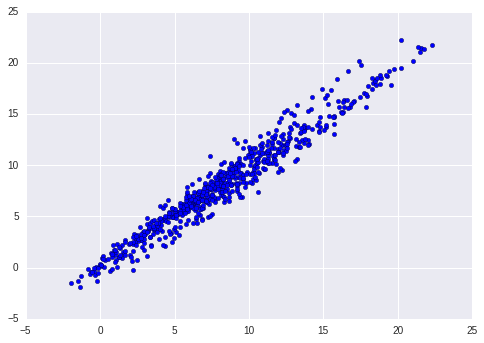

In [6]:
plt.scatter(df_april[1:], df_april[:-1]);

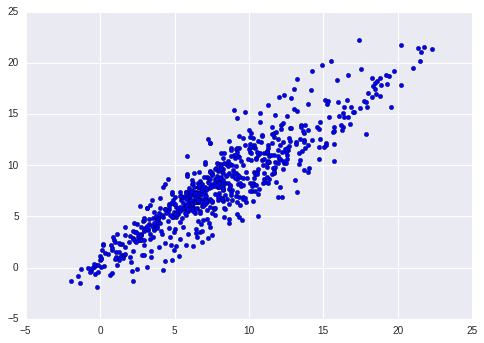

In [7]:
plt.scatter(df_april[2:], df_april[:-2]);

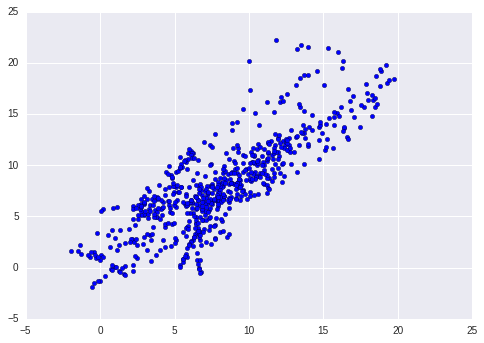

In [8]:
plt.scatter(df_april[24:], df_april[:-24]);

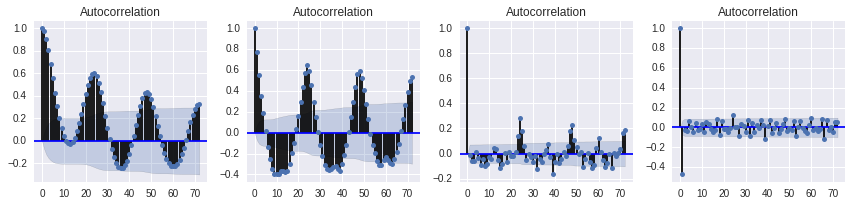

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()

In [10]:
model = sm.tsa.AR(df_march.temp)

In [11]:
result = model.fit(72)

In [12]:
sm.stats.durbin_watson(result.resid)

1.9985623006352942

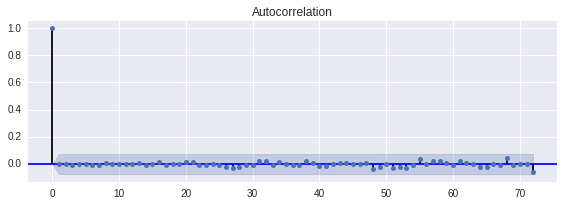

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
fig.tight_layout()

/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


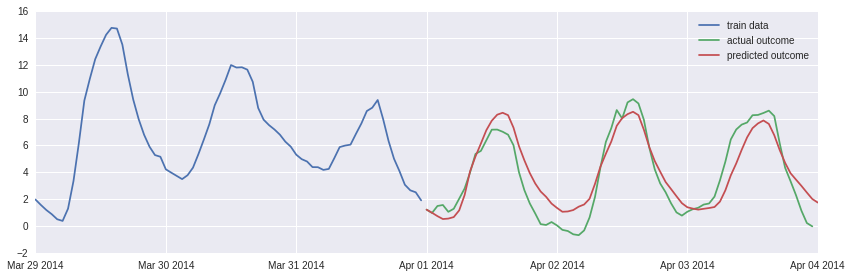

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

ax.legend()
fig.tight_layout()